#### Finding the length of the Predicted Mask (in pixels) with Open-CV and Numpy

#### Method:
* Find Contours in the Binary Mask.
* Using the largest contour, draw the Bounding Box.
* Draw Horizontal, Vertical and Diagonal Line to measure the length.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

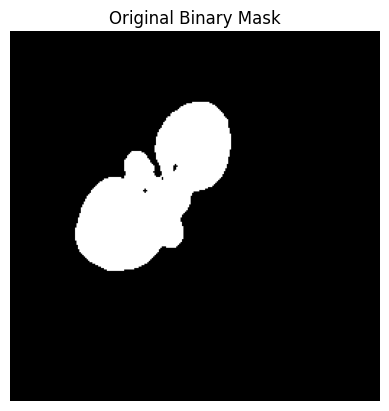

In [2]:
binary_mask = cv2.imread("./masks/result15.png", cv2.IMREAD_GRAYSCALE)

mask_plot = plt.imshow(binary_mask, cmap="gray")
plt.title("Original Binary Mask")
plt.axis("off")
plt.show()

In [3]:
# Empty image to draw Contour, BBox and Lines on
vis = np.ones_like(binary_mask, dtype=np.uint8)

# Finding Contours
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Getting the Largest Contour
largest_contour = max(contours, key=cv2.contourArea)

In [4]:
# Getting the co-ordinates for smalles possible Bounding Box
x, y, w, h = cv2.boundingRect(largest_contour)

# Calculating line lengths
diagonal_length = np.sqrt(w**2 + h**2)
horizontal_length = w
vertical_length = h

In [5]:
# Drawing

# Contour - Boundary
cv2.drawContours(vis, contours, -1, (255, 255, 255), 2)

# Bounding Box
cv2.rectangle(vis, (x, y), (x + w, y + h), (255, 255, 255), 1)

# Diagonal Line
cv2.line(vis, (x, y), (x + w, y + h), (255, 255, 255), 1)

# Horizontal Line
cv2.line(vis, (x, y + h // 2), (x + w, y + h // 2), (255, 255, 255), 1)

# Vertical Line
cv2.line(vis, (x + w // 2, y), (x + w // 2, y + h), (255, 255, 255), 1)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

Diagonal Length: 159.23 px
Horizontal Length: 108.00 px
Vertical Length: 117.00 px


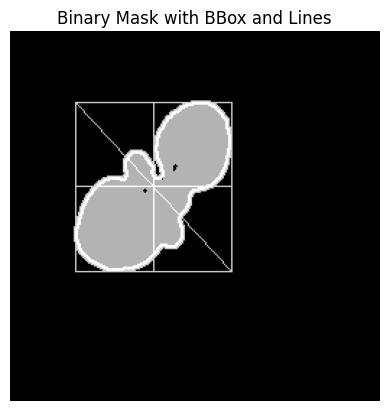

In [6]:
# Taking a weighted sum of Original Binary Mask and Masked Image
blended_image = cv2.addWeighted(binary_mask, 0.7, vis, 0.8, 0)

print(f"Diagonal Length: {diagonal_length:.2f} px")
print(f"Horizontal Length: {horizontal_length:.2f} px")
print(f"Vertical Length: {vertical_length:.2f} px")

blended_plot = plt.imshow(blended_image, cmap="gray")
plt.title("Binary Mask with BBox and Lines")
plt.axis("off")
plt.show()